In [2]:
# Filter warnings for readability
import warnings
warnings.filterwarnings('ignore')

Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Read in Dataset

In [3]:
events_df = pd.read_csv('Nat Cat Events.csv')
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91479 entries, 0 to 91478
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   url            91479 non-null  object
 1   url_mobile     25383 non-null  object
 2   title          91384 non-null  object
 3   seendate       91479 non-null  object
 4   socialimage    79390 non-null  object
 5   domain         91479 non-null  object
 6   language       91479 non-null  object
 7   sourcecountry  89958 non-null  object
dtypes: object(8)
memory usage: 5.6+ MB


- The data is in 91479x8 structure
- All columns are of the datatype 'object'

Snapshot of Data

In [4]:
events_df.head()

,url,url_mobile,title,seendate,socialimage,domain,language,sourcecountry
0,https://www.wpri.com/weather/severe-weather/20...,https://www.wpri.com/weather/severe-weather/20...,2023 was a year of extreme weather in Southern...,20240101T223000Z,https://www.wpri.com/wp-content/uploads/sites/...,wpri.com,English,United States
1,https://volcanoes.usgs.gov/hans2/view/notice/D...,NaN,HAWAIIAN VOLCANO OBSERVATORY DAILY UPDATE Mond...,20240101T220000Z,NaN,volcanoes.usgs.gov,English,United States
2,https://www.ktbs.com/online_features/home_impr...,NaN,How to Protect Your Family from Tornadoes,20240101T124500Z,https://bloximages.newyork1.vip.townnews.com/k...,ktbs.com,English,United States
3,https://www.ctvnews.ca/climate-and-environment...,NaN,Iceland volcanoes bring tourists to island cou...,20240101T223000Z,https://www.ctvnews.ca/content/dam/ctvnews/en/...,ctvnews.ca,English,Canada
4,https://www.berkshireeagle.com/online_features...,NaN,How to Protect Your Family from Tornadoes,20240101T090000Z,https://bloximages.newyork1.vip.townnews.com/b...,berkshireeagle.com,English,United States


In [5]:
print(f'The number of articles in the dataset is: {len(events_df)}')

The number of articles in the dataset is: 91479


### Overview Analysis

##### Null Percent

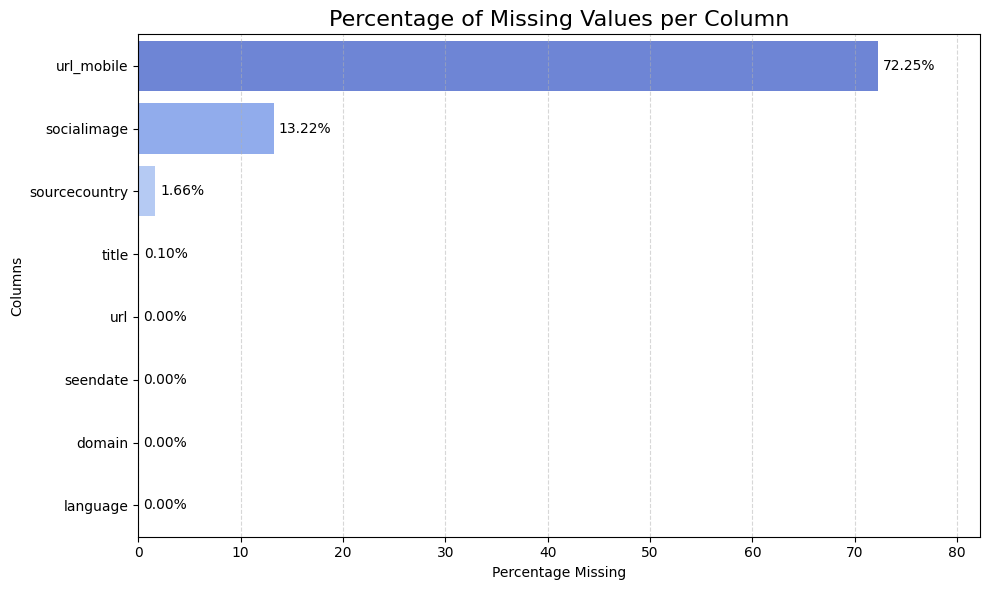

In [6]:
def plot_null_percent(df):
    # Calculate percentage of missing values per column
    null_percent = df.isnull().mean() * 100
    null_percent = null_percent.sort_values(ascending=False)

    if null_percent.empty:
        print("No missing values found in the dataset.")
        return

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=null_percent.values, y=null_percent.index, palette="coolwarm")

    # Annotate bars with percentages
    for i, v in enumerate(null_percent.values):
        plt.text(v + 0.5, i, f"{v:.2f}%", va='center', fontsize=10)

    plt.title("Percentage of Missing Values per Column", fontsize=16)
    plt.xlabel("Percentage Missing")
    plt.ylabel("Columns")
    plt.xlim(0, max(null_percent.values) + 10)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_null_percent(events_df)

#### Uniqueness Percent

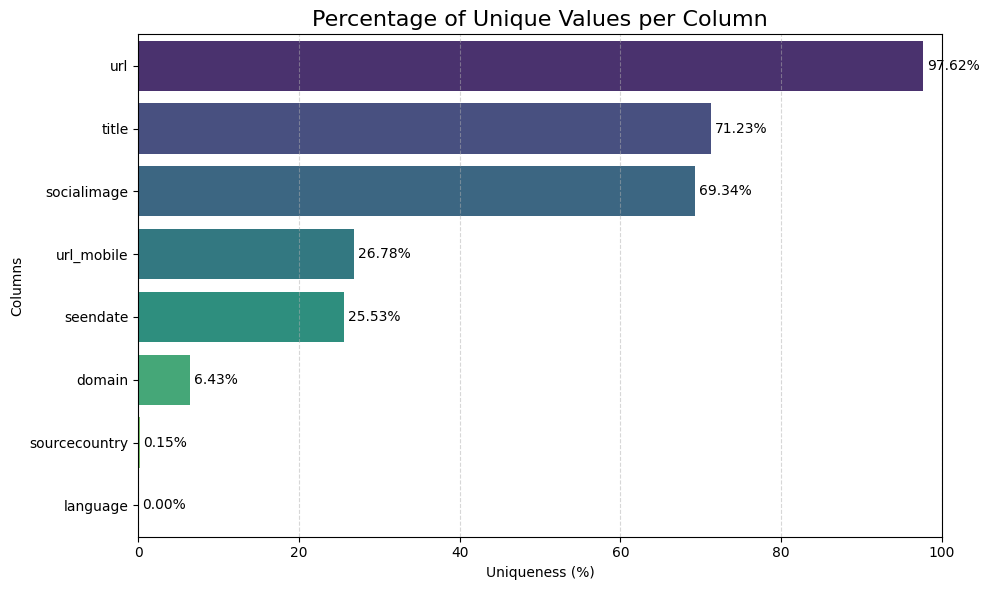

In [7]:
def plot_uniqueness_percent(df):
    # Calculate uniqueness percentage per column
    uniqueness_percent = df.nunique() / len(df) * 100
    uniqueness_percent = uniqueness_percent.sort_values(ascending=False)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=uniqueness_percent.values, y=uniqueness_percent.index, palette="viridis")

    # Annotate bars with percentages
    for i, v in enumerate(uniqueness_percent.values):
        plt.text(v + 0.5, i, f"{v:.2f}%", va='center', fontsize=10)

    plt.title("Percentage of Unique Values per Column", fontsize=16)
    plt.xlabel("Uniqueness (%)")
    plt.ylabel("Columns")
    plt.xlim(0, 100)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    
plot_uniqueness_percent(events_df)

#### Range of Publication Dates

In [8]:
events_df['seendate'].head()

0    20240101T223000Z
1    20240101T220000Z
2    20240101T124500Z
3    20240101T223000Z
4    20240101T090000Z
Name: seendate, dtype: object

Dates are in ISO-like but compact

In [9]:
events_df['parsed_date'] = pd.to_datetime(events_df['seendate'], format='%Y%m%dT%H%M%SZ', errors='coerce')

In [10]:
events_df['parsed_date']

0       2024-01-01 22:30:00
1       2024-01-01 22:00:00
2       2024-01-01 12:45:00
3       2024-01-01 22:30:00
4       2024-01-01 09:00:00
                ...        
91474   2024-12-31 06:15:00
91475   2024-12-31 07:30:00
91476   2024-12-31 09:15:00
91477   2024-12-31 17:45:00
91478   2024-12-31 01:15:00
Name: parsed_date, Length: 91479, dtype: datetime64[ns]


📊 Date Summary Statistics:
Min            : 2024-01-01 00:00:00
Max            : 2025-01-01 00:15:00
Median         : 2024-07-02 00:00:00
Mean           : 2024-07-01 23:42:05.635392
Range (Days)   : 366


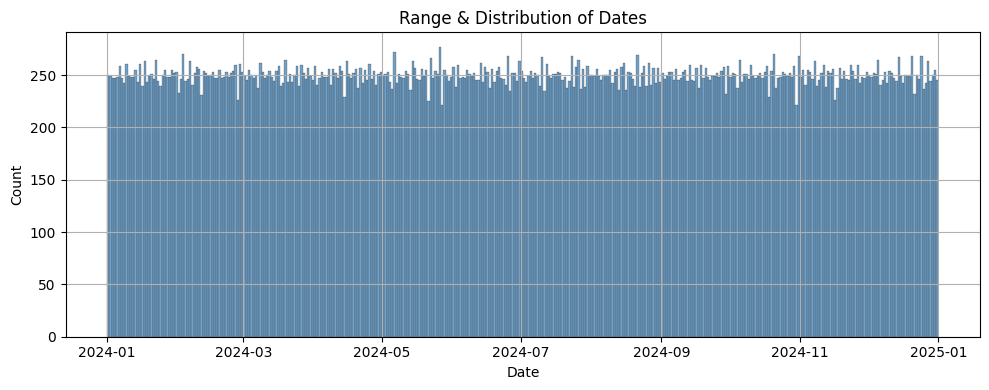

In [11]:
def summarize_and_plot_dates(df, date_col):
    # Step 1: Convert the string to datetime
    df['parsed_date'] = pd.to_datetime(df[date_col], format='%Y%m%dT%H%M%SZ', errors='coerce')

    valid_dates = df['parsed_date']

    range = (valid_dates.max() - valid_dates.min()).days

    # Step 2: Summary statistics
    summary = {
        "Min": valid_dates.min(),
        "Max": valid_dates.max(),
        "Median": valid_dates.median(),
        "Mean": valid_dates.mean(),
        "Range (Days)": range
    }

    print("\n📊 Date Summary Statistics:")
    for k, v in summary.items():
        print(f"{k:15}: {v}")

    # Step 3: Plotting

    # 3.1 Histogram of counts over time
    plt.figure(figsize=(10, 4))
    sns.histplot(valid_dates, bins=range, kde=False, color="steelblue")
    plt.title("Range & Distribution of Dates")
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

summarize_and_plot_dates(events_df, 'seendate')

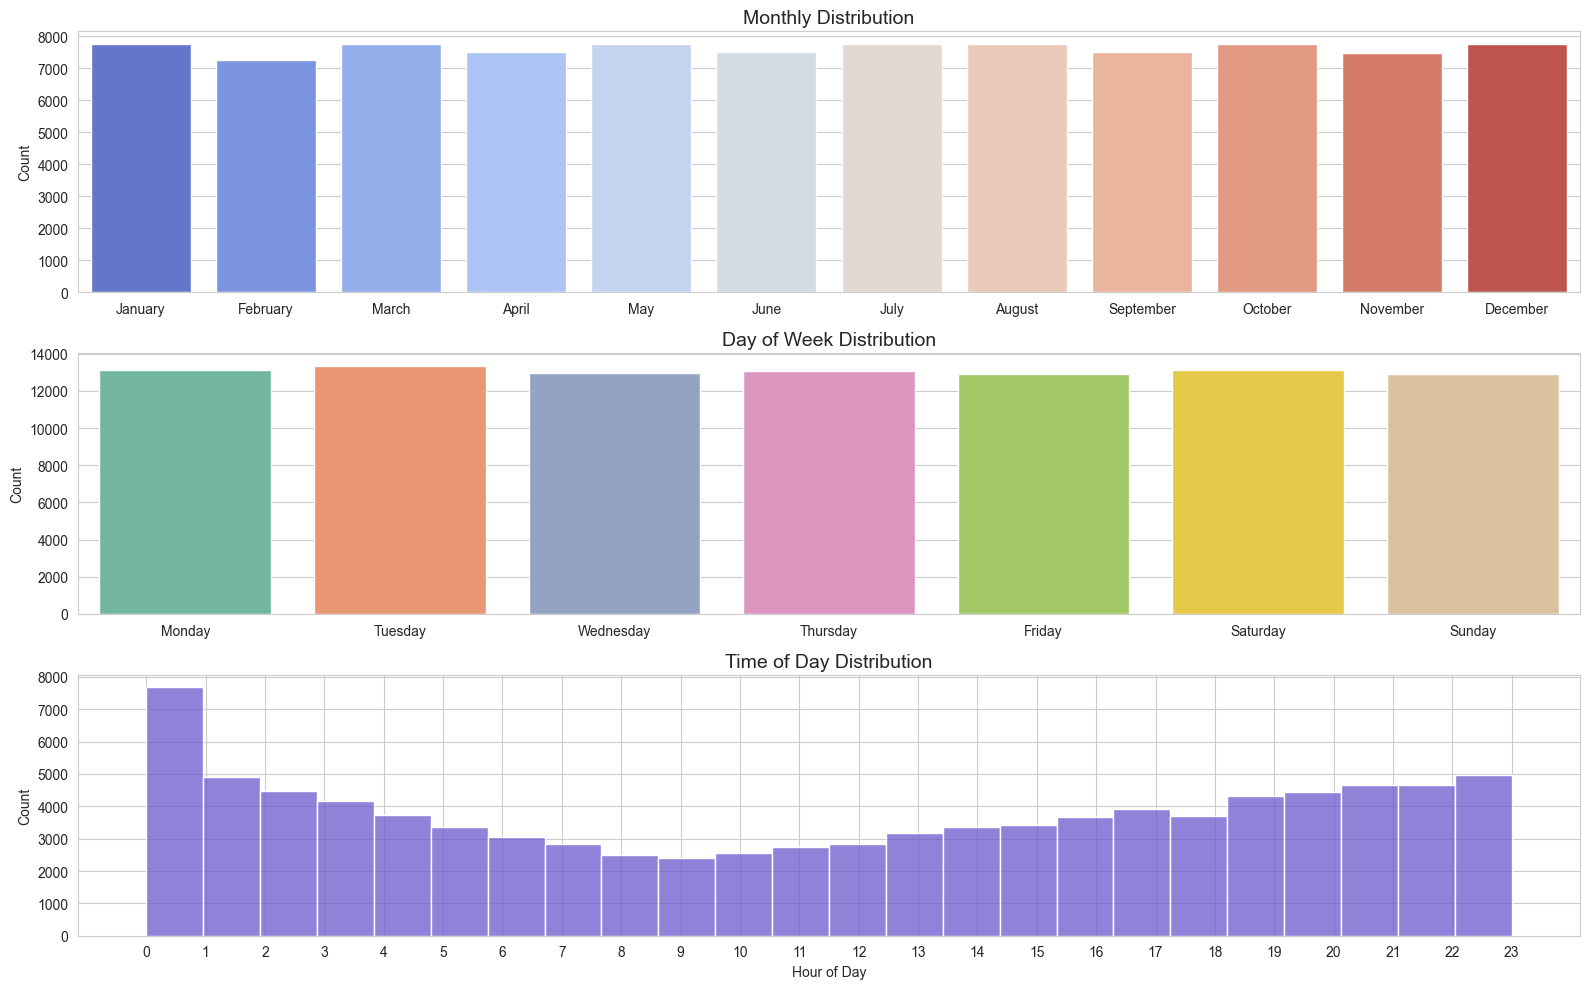

In [12]:
def plot_time_distributions(df, datetime_col):
    df['parsed_date'] = pd.to_datetime(df[datetime_col], format='%Y%m%dT%H%M%SZ', errors='coerce')
    # Extract components
    df['month'] = df[datetime_col].dt.month_name()
    df['day_of_week'] = df[datetime_col].dt.day_name()
    df['hour'] = df[datetime_col].dt.hour

    # Set consistent style
    sns.set_style("whitegrid")
    plt.figure(figsize=(16, 10))

    # 1. Monthly Distribution
    plt.subplot(3, 1, 1)
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    sns.countplot(data=df, x='month', order=month_order, palette='coolwarm')
    plt.title("Monthly Distribution", fontsize=14)
    plt.xlabel("")
    plt.ylabel("Count")

    # 2. Day of Week Distribution
    plt.subplot(3, 1, 2)
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    sns.countplot(data=df, x='day_of_week', order=day_order, palette='Set2')
    plt.title("Day of Week Distribution", fontsize=14)
    plt.xlabel("")
    plt.ylabel("Count")

    # 3. Time of Day Distribution (Hourly)
    plt.subplot(3, 1, 3)
    sns.histplot(data=df, x='hour', bins=24, kde=False, color='slateblue', edgecolor='white')
    plt.title("Time of Day Distribution", fontsize=14)
    plt.xlabel("Hour of Day")
    plt.ylabel("Count")
    plt.xticks(range(0, 24))

    plt.tight_layout()
    plt.show()
    
plot_time_distributions(events_df, 'parsed_date')

#### Title Lengths

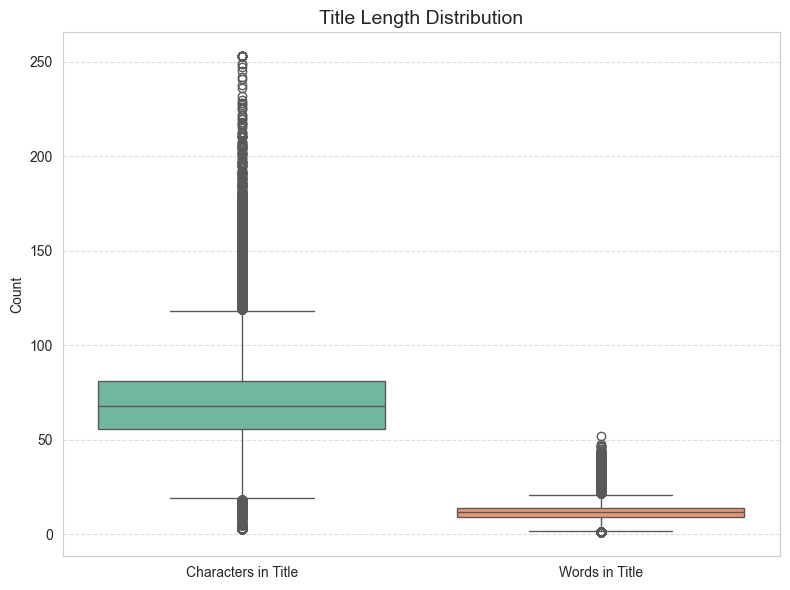

In [13]:
def plot_title_length_boxplots(df):
    # Compute number of characters and words
    df['title_char_count'] = df['title'].astype(str).str.len()
    df['title_word_count'] = df['title'].astype(str).str.split().apply(len)

    # Reshape to long-form for plotting
    melted = pd.melt(df, 
                     value_vars=['title_char_count', 'title_word_count'], 
                     var_name='Metric', 
                     value_name='Count')

    # Rename metrics for cleaner plot
    melted['Metric'] = melted['Metric'].map({
        'title_char_count': 'Characters in Title',
        'title_word_count': 'Words in Title'
    })

    # Plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=melted, x='Metric', y='Count', palette='Set2')

    plt.title("Title Length Distribution", fontsize=14)
    plt.ylabel("Count")
    plt.xlabel("")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    
plot_title_length_boxplots(events_df)

In [14]:
def print_title_length_summary(df):
    df['title_char_count'] = df['title'].astype(str).str.len()
    df['title_word_count'] = df['title'].astype(str).str.split().apply(len)

    char_stats = df['title_char_count'].describe()
    word_stats = df['title_word_count'].describe()

    print("\n📦 Title Length Summary")
    print("=" * 30)
    print(f"Characters per Title:")
    print(f"  Min     : {char_stats['min']}")
    print(f"  Median  : {char_stats['50%']}")
    print(f"  Mean    : {char_stats['mean']:.2f}")
    print(f"  Max     : {char_stats['max']}")
    print(f"  Std Dev : {char_stats['std']:.2f}")
    print()

    print(f"Words per Title:")
    print(f"  Min     : {word_stats['min']}")
    print(f"  Median  : {word_stats['50%']}")
    print(f"  Mean    : {word_stats['mean']:.2f}")
    print(f"  Max     : {word_stats['max']}")
    print(f"  Std Dev : {word_stats['std']:.2f}")

print_title_length_summary(events_df)


📦 Title Length Summary
Characters per Title:
  Min     : 3.0
  Median  : 68.0
  Mean    : 69.54
  Max     : 253.0
  Std Dev : 21.46

Words per Title:
  Min     : 1.0
  Median  : 12.0
  Mean    : 12.01
  Max     : 52.0
  Std Dev : 4.11


In [15]:
total_words = events_df['title'].str.split().str.len().sum()
print("Total number of words:", int(total_words))

Total number of words: 1098383


#### Source Country Distribution

In [17]:
print(f"There are {len(events_df['sourcecountry'].unique())} source countries")

There are 136 source countries


In [18]:
def plot_top_sourcecountries(df, top_n=15):
    # Fill NaN with 'Missing'
    data = df['sourcecountry'].fillna('Missing')

    # Get top N countries by count
    top_countries = data.value_counts().nlargest(top_n)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(y=top_countries.index, x=top_countries.values, palette='Spectral')

    plt.title(f"Top {top_n} Source Countries", fontsize=16)
    plt.xlabel("Count")
    plt.ylabel("Source Country")
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

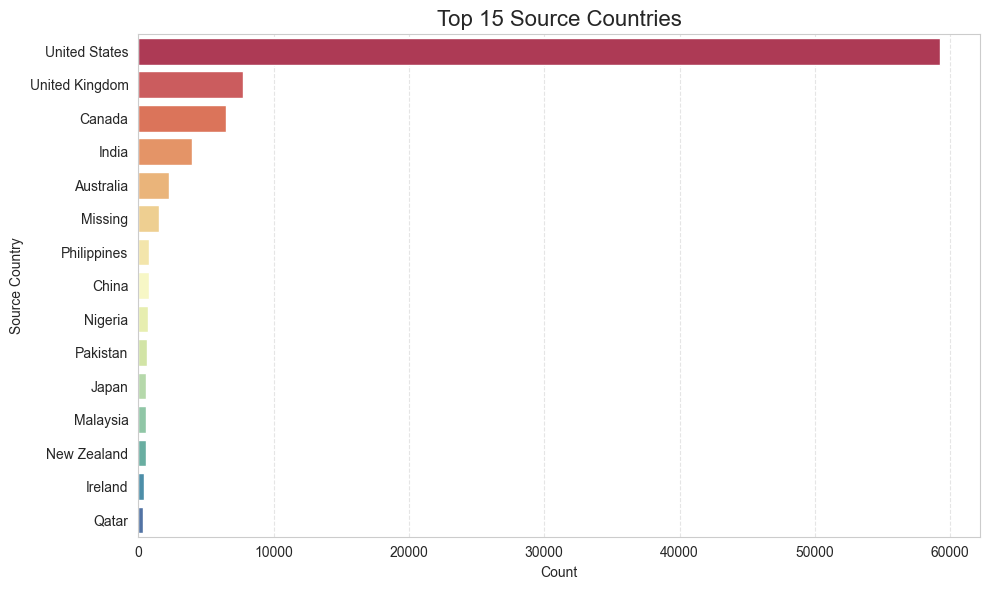

In [19]:
plot_top_sourcecountries(events_df)

#### URL Analysis

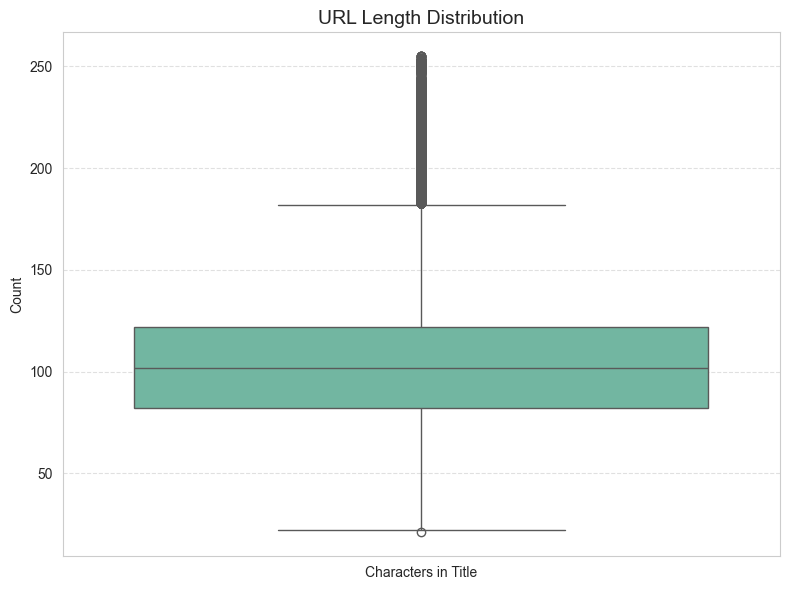

In [20]:
def plot_title_length_boxplots(df, column):
    # Compute number of characters and words
    df['url_char_count'] = df[column].astype(str).str.len()

    # Reshape to long-form for plotting
    melted = pd.melt(df, 
                     value_vars=['url_char_count'], 
                     var_name='Metric', 
                     value_name='Count')

    # Rename metrics for cleaner plot
    melted['Metric'] = melted['Metric'].map({
        'url_char_count': 'Characters in Title'
    })

    # Plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=melted, x='Metric', y='Count', palette='Set2')

    plt.title("URL Length Distribution", fontsize=14)
    plt.ylabel("Count")
    plt.xlabel("")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    
plot_title_length_boxplots(events_df, 'url')

#### Domain

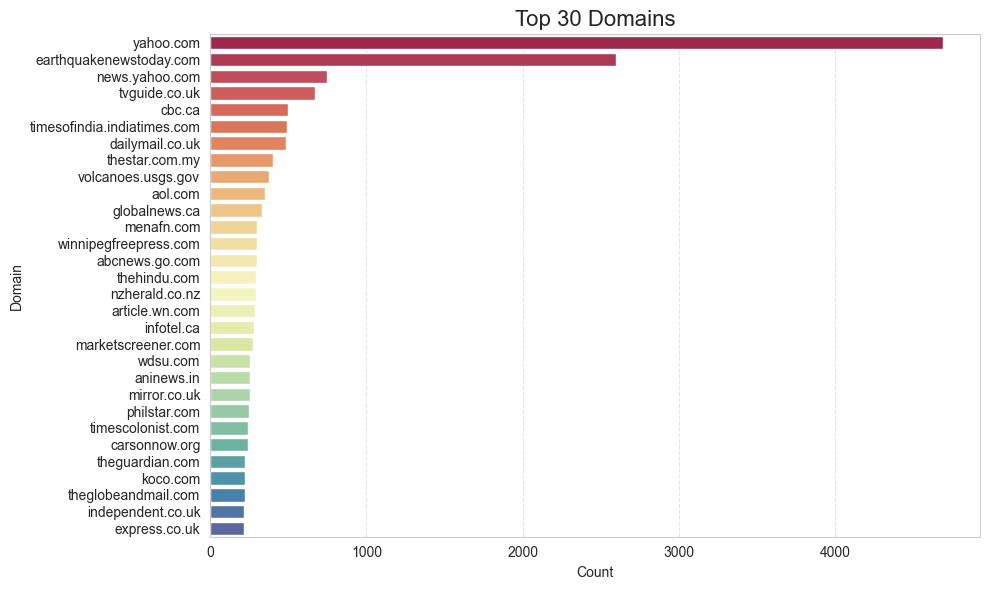

In [23]:
def plot_top_domains(df, top_n=15):
    # Fill NaN with 'Missing'
    data = df['domain'].fillna('Missing')

    # Get top N countries by count
    top_countries = data.value_counts().nlargest(top_n)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(y=top_countries.index, x=top_countries.values, palette='Spectral')

    plt.title(f"Top {top_n} Domains", fontsize=16)
    plt.xlabel("Count")
    plt.ylabel("Domain")
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_top_domains(events_df, 30)